<a href="https://colab.research.google.com/github/FrkAk/Deep_Learning_Workshop/blob/master/Workshop/Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

## Upload and Preview the Dataset

In [130]:
names=["LIMIT_BAL",	"SEX",	"EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]
data = pd.read_csv("dataset.csv",
                   skiprows=1,
                   names=names)
dim = len(names)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Split the Dataset

In [131]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
12700,360000.0,1,1,1,48,-1,-1,-1,-1,-2,...,-4.0,-4.0,881.0,2548.0,5536.0,0.0,0.0,885.0,1595.0,0
3416,200000.0,2,2,1,37,0,0,0,0,0,...,191730.0,171269.0,151550.0,8017.0,8000.0,8000.0,9000.0,7000.0,6000.0,0
28313,100000.0,2,1,2,29,0,0,0,0,0,...,61465.0,55501.0,57892.0,4000.0,5030.0,10000.0,5000.0,10000.0,10000.0,0
4097,200000.0,1,2,1,30,1,-2,-2,-2,-2,...,736.0,736.0,316.0,736.0,736.0,736.0,736.0,316.0,1156.0,0
25954,150000.0,2,1,1,45,-2,-2,-2,-2,-2,...,5985.0,8333.0,8241.0,4133.0,14296.0,5990.0,8342.0,8241.0,17817.0,0


### Extract Labels

In [132]:
train_features = train.copy()
train_labels = train.pop('default.payment.next.month')

test_features = test.copy()
test_labels = test.pop('default.payment.next.month')

### Convert to NumPy array

In [133]:
train_features = np.array(train_features)
test_features = np.array(test_features)

In [ ]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

## Model Structure

In [169]:
model = tf.keras.Sequential([
  layers.Conv1D(filters=256, kernel_size=3,
                strides=1,
                activation="relu",
                padding='causal',
                input_shape=[dim, 1]),
  layers.Dense(128,activation='relu'),
  layers.Dense(64,activation='relu'),
  # layers.Dense(32,activation='relu'),
  layers.Dense(16,activation='relu'),
  layers.Dense(1,activation='sigmoid')
])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 256)           1024      
                                                                 
 dense (Dense)               (None, 24, 128)           32896     
                                                                 
 dense_1 (Dense)             (None, 24, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 24, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 24, 1)             17        
                                                                 
Total params: 43,233
Trainable params: 43,233
Non-trainable params: 0
_________________________________________________________________


## Tune the Learning Rate

It is needed to pick an optimal learning rate.

In [170]:
# Get initial weights
init_weights = model.get_weights()

In [ ]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                  optimizer = optimizer,metrics=['accuracy'])

# Train the model
history = model.fit(train_features,train_labels, epochs=100, callbacks=[lr_schedule])

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 10])

## Train the model

In [171]:
# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model.set_weights(init_weights)

# Set the learning rate
learning_rate = 3e-5

In [172]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

In [ ]:
history = model.fit(train_features, train_labels, 
                    validation_split=0.2,
                    shuffle = True,
                    epochs=20,)

Epoch 1/20
541/600 [==========================>...] - ETA: 2s - loss: 2.3360 - accuracy: 0.7533

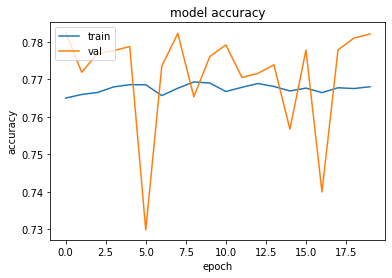

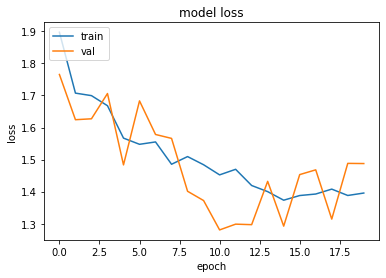

In [148]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [129]:
model.evaluate(test_features, test_labels)

188/188 [==============================] - 1s 6ms/step - loss: 1.2239 - accuracy: 0.6490


[1.2239227294921875, 0.6490415334701538]